<a href="https://colab.research.google.com/github/shreyus3003/Deep_Learning/blob/master/Home_work_4_Graded/resnet_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Libraries
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np

from tensorflow.keras.datasets import mnist

import keras
from keras import models
from keras.datasets import cifar100
import keras.layers as layers
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, BatchNormalization, Activation, AveragePooling2D
from keras.models import Sequential
from keras.utils import plot_model
from keras.preprocessing import image
from keras.initializers import Identity
import tensorflow as tf
import datetime
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, TensorBoard


In [0]:

(x_train, y_train), (x_test, y_test) = cifar100.load_data()


169009152/169001437 [==============================] - 11s 0us/step


[41]


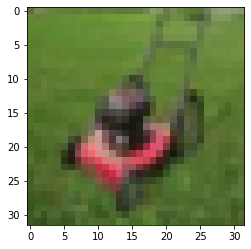

In [0]:
print(y_train[500])
pyplot.imshow(x_train[500])

In [0]:
y_train.shape

(50000, 1)

In [0]:
np.random.seed(1)

img, labels = (x_train[0:1000].reshape(1000, 32, 32, 3), y_train[0:1000])




one_hot_labels = np.zeros((len(labels), 100))

for i,l in enumerate(labels):
  one_hot_labels[i][l] = 1
labels = one_hot_labels


test_label = np.zeros((len(y_test), 100))
for i,l in enumerate(y_test):
    test_label[i][l] = 1



In [0]:
def create_model():

  model = Sequential()
  model.add(Conv2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),padding="same"))
  model.add(BatchNormalization())
  model.add(Activation('relu'))



  model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

  model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))

  model.add(Flatten())

  model.add(Dense(units=100, activation="softmax"))

  return model

In [0]:
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
average_pooling2d_1 (Average (None, 8, 8, 128)        

In [0]:

one_hot_labels = np.zeros((len(y_train), 100))

for i,l in enumerate(y_train):
  one_hot_labels[i][l] = 1
labels = one_hot_labels

In [0]:

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.binary_crossentropy, metrics=['accuracy'])
              

log_dir="logs/resnet-keras-xtrain" 
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


model.fit(x=x_train, 
          y=labels, 
          epochs=10, 
          validation_data=(x_test, test_label), 
          callbacks=[tensorboard_callback])



Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 44s 882us/step - loss: 0.0339 - accuracy: 0.9911 - val_loss: 0.0343 - val_accuracy: 0.9911
Epoch 2/10
50000/50000 [==============================] - 43s 868us/step - loss: 0.0259 - accuracy: 0.9926 - val_loss: 0.0353 - val_accuracy: 0.9911
Epoch 3/10
50000/50000 [==============================] - 44s 872us/step - loss: 0.0189 - accuracy: 0.9943 - val_loss: 0.0357 - val_accuracy: 0.9909
Epoch 4/10
50000/50000 [==============================] - 43s 869us/step - loss: 0.0130 - accuracy: 0.9959 - val_loss: 0.0443 - val_accuracy: 0.9898
Epoch 5/10
50000/50000 [==============================] - 44s 870us/step - loss: 0.0085 - accuracy: 0.9972 - val_loss: 0.0498 - val_accuracy: 0.9893
Epoch 6/10
50000/50000 [==============================] - 44s 875us/step - loss: 0.0058 - accuracy: 0.9980 - val_loss: 0.0628 - val_accuracy: 0.9884
Epoch 7/10
50000/50000 [==============================] 